### Metanalysis *Review code* 

#### Define the keywords and generate counts from studies

In [ ]:
library(tidyverse)
library(glue)
library(ggbreak)
library(ComplexHeatmap)
library(ggforce)
library(xml2)
library(ggplot2)
library(dplyr)
require(maps)
require(circlize)
library(ggrepel)
library(tidyverse)
library(gridExtra)
library(rentrez)
library(ggbreak)


In [2]:
years = 2000:2024

stem_cell = glue("stem cell AND {years}[PDAT]")
syst_Biol = glue("systems biology AND {years}[PDAT]")
a_intelig = glue("artificial intelligence AND {years}[PDAT]")

Search_All_Counts = tibble(year = years,
                           stem_cell = stem_cell,
                           syst_Biol = syst_Biol,
                           a_intelig = a_intelig) |>
  mutate(stem_cell_count = map_dbl(stem_cell, ~entrez_search(db='pubmed',term=.x)$count),
         syst_Biol_count = map_dbl(syst_Biol, ~entrez_search(db='pubmed',term=.x)$count),
         a_intelig_count = map_dbl(a_intelig, ~entrez_search(db='pubmed',term=.x)$count))

In [724]:
Search_All_Counts_plot = Search_All_Counts |>
                         select(year, stem_cell_count, syst_Biol_count, a_intelig_count) |>
                         pivot_longer(-year) |> filter(year != 2024)
Search_All_Counts_plot$name = factor(Search_All_Counts_plot$name, levels = c('stem_cell_count','syst_Biol_count', 'a_intelig_count'))

In [726]:
first_aal_bar = Search_All_Counts_plot |>
  ggplot(aes(year, value, group = name, fill = name)) +
  geom_col() +
  theme_minimal(15) +
  facet_wrap(~name) +
  theme(axis.text.x = element_text(angle=45, vjust = 1, hjust = 1)) +
  scale_fill_manual(values =  c('#F39F5A', '#AE445A', '#451952'))

In [729]:
tiff("~/Desktop/review/barplot_all.tiff", units="in", width=10, height=5, res=300)
first_aal_bar
dev.off()

pdf 
  2

In [730]:
barplot_simple = Search_All_Counts_plot |>
  group_by(name) |>
  summarise(sumss = sum(value))
barplot_simple$name = factor(barplot_simple$name, levels = c('stem_cell_count','syst_Biol_count', 'a_intelig_count'))

In [731]:
all_bar = barplot_simple |>
  ggplot(aes(name, sumss, fill = name)) +
  geom_col(width = .5) +
  theme_minimal(12) +
  scale_fill_manual(values =  c('#F39F5A', '#AE445A', '#451952')) +
  geom_label(aes(label = paste(sumss)), fill = 'white') 

In [733]:
tiff("~/Desktop/review/barplot_all_count.tiff", units="in", width=8, height=5, res=300)
all_bar
dev.off()

pdf 
  2

### Code to specific searchs *SC+AI, SC+SY, SC+SY+AI*

Auxiliar function

In [2]:
create_plot = function(data, name, fill_color) {
  plot_data = data[data$name == name, ]
  
  ggplot(plot_data, aes(year, value, group = name, fill = name)) +
    geom_line(size = .2) +
    geom_point(aes(size = value), shape = 21, colour = 'black') +
    theme_minimal(15) +
    facet_wrap(~name, scales = 'free_y') +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
          legend.position = 'none') +
    scale_fill_manual(values = fill_color)
}

Starting the search

In [19]:
stem_cell_Sy = glue("stem cell AND systems biology AND {years}[PDAT]")
stem_cell_AI = glue("stem cell AND artificial intelligence AND {years}[PDAT]")
steM_cell_AI_Sy = glue("stem cell AND system biology AND artificial intelligence AND {years}[PDAT]")

Sys_AI_stem_count = tibble(year = years,
                           stem_cell_Sy = stem_cell_Sy,
                           stem_cell_AI = stem_cell_AI,
                           steM_cell_AI_Sy = steM_cell_AI_Sy) |>
  mutate(stem_cell_Sy_count = map_dbl(stem_cell_Sy, ~entrez_search(db='pubmed',term=.x)$count),
         stem_cell_AI_count = map_dbl(stem_cell_AI, ~entrez_search(db='pubmed',term=.x)$count),
         steM_cell_AI_Sy_count = map_dbl(steM_cell_AI_Sy, ~entrez_search(db='pubmed',term=.x)$count))

In [20]:
Search_AI_Sy_Counts_plot = Sys_AI_stem_count |>
  select(year, stem_cell_Sy_count, stem_cell_AI_count, steM_cell_AI_Sy_count) |>
  pivot_longer(-year) |> filter(year != 2024) 
Search_AI_Sy_Counts_plot$name = factor(Search_AI_Sy_Counts_plot$name, levels = c('stem_cell_Sy_count', 'stem_cell_AI_count', 'steM_cell_AI_Sy_count'))

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


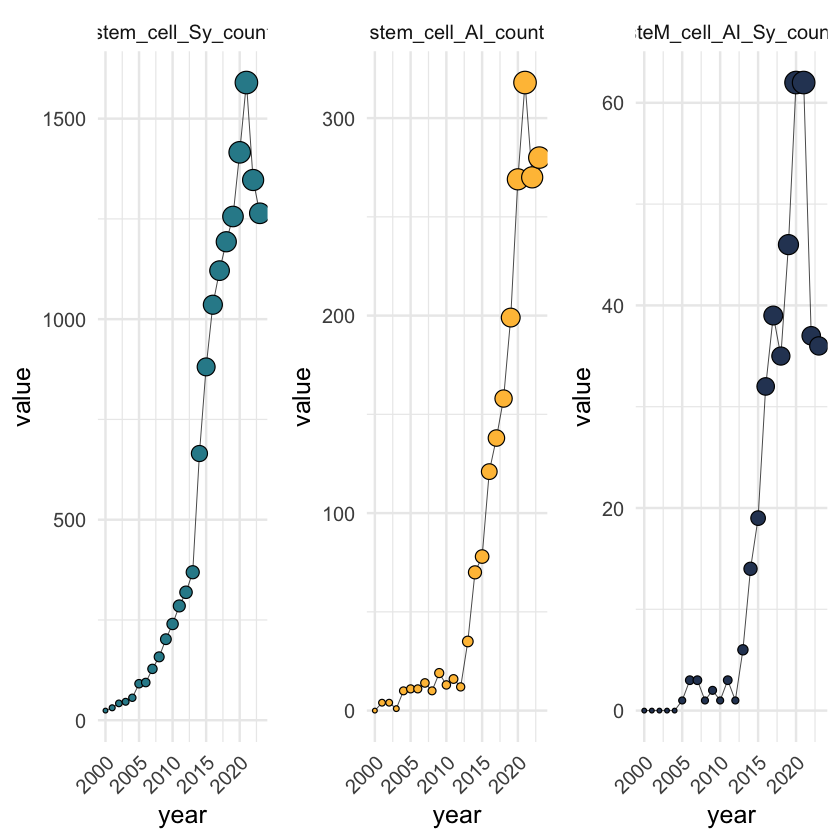

In [23]:
stem_Sy_plot = create_plot(Search_AI_Sy_Counts_plot, 'stem_cell_Sy_count', '#2E8A99')
stem_AI_plot = create_plot(Search_AI_Sy_Counts_plot, 'stem_cell_AI_count', '#FFC045')
stem_AI_Sy_plot = create_plot(Search_AI_Sy_Counts_plot, 'steM_cell_AI_Sy_count', '#2D4263')

grid.arrange(stem_Sy_plot,stem_AI_plot,stem_AI_Sy_plot ,ncol=3)

In [ ]:
head(Search_AI_Sy_Counts_plot)

In [743]:
barplot_simple_AI_SY = Search_AI_Sy_Counts_plot |>
  group_by(name) |>
  summarise(sumss = sum(value))
#barplot_simple_AI_SY$name = factor(barplot_simple_AI_SY$name, levels = c('stem_cell_count','syst_Biol_count', 'a_intelig_count'))

In [744]:
head(barplot_simple_AI_SY)

name                  sumss
1 stem_cell_Sy_count    13854
2 stem_cell_AI_count     2061
3 steM_cell_AI_Sy_count   403

In [761]:
bar.1 = barplot_simple_AI_SY |>
  ggplot(aes(name, sumss, fill = name)) +
  geom_col(width = .5) +
  theme_minimal(18) +
  scale_fill_manual(values =  c('#2E8A99', '#FFC045', '#2D4263')) +
  geom_label(aes(label = paste(sumss)), fill = 'white') +
  scale_y_continuous(limits = c(0,14500)) +
  scale_y_break(c(5000,10000)) +
  theme(axis.text.x = element_blank())

In [762]:
tiff("~/Desktop/review/barplot_supp.tiff", units="in", width=8, height=5, res=300)
bar.1
dev.off()

pdf 
  2

### Cell types to stem cell reserach

In [37]:
nSCsy = glue("Neural Stem Cells[Title/Abstract] OR NSCs[Title/Abstract] AND systems biology AND {years}[PDAT]")
nSCml = glue("Neural Stem Cells[Title/Abstract] OR NSCs[Title/Abstract] AND machine learning AND {years}[PDAT]")
nSCdl = glue("Neural Stem Cells[Title/Abstract] OR NSCs[Title/Abstract] AND deep learning AND {years}[PDAT]")

hSCsy = glue("hematopoietic Stem Cells[Title/Abstract] OR HSCs[Title/Abstract] AND systems biology AND {years}[PDAT]")
hSCml = glue("hematopoietic Stem Cells[Title/Abstract] OR HSCs[Title/Abstract] AND machine learning AND {years}[PDAT]")
hSCdl = glue("hematopoietic Stem Cells[Title/Abstract] OR HSCs[Title/Abstract] AND deep learning AND {years}[PDAT]")

eSCsy = glue("embryonic Stem Cells[Title/Abstract] OR ESCs[Title/Abstract] AND systems biology AND {years}[PDAT]")
eSCml = glue("embryonic Stem Cells[Title/Abstract] OR ESCs[Title/Abstract] AND machine learning AND {years}[PDAT]")
eSCdl = glue("embryonic Stem Cells[Title/Abstract] OR ESCs[Title/Abstract] AND deep learning AND {years}[PDAT]")

aSCsy = glue("adult Stem Cells[Title/Abstract] OR ASCs[Title/Abstract] AND systems biology AND {years}[PDAT]")
aSCml = glue("adult Stem Cells[Title/Abstract] OR ASCs[Title/Abstract] AND machine learning AND {years}[PDAT]")
aSCdl = glue("adult Stem Cells[Title/Abstract] OR ASCs[Title/Abstract] AND deep learning AND {years}[PDAT]")

iSCsy = glue("induced Pluripotent Stem Cells[Title/Abstract] OR iPSCs[Title/Abstract] AND systems biology AND {years}[PDAT]")
iSCml = glue("induced Pluripotent Stem Cells[Title/Abstract] OR iPSCs[Title/Abstract] AND machine learning AND {years}[PDAT]")
iSCdl = glue("induced Pluripotent Stem Cells[Title/Abstract] OR iPSCs[Title/Abstract] AND deep learning AND {years}[PDAT]")

mSCsy = glue("mesenchymal Stem Cells[Title/Abstract] OR MSCs[Title/Abstract] AND systems biology AND {years}[PDAT]")
mSCml = glue("mesenchymal Stem Cells[Title/Abstract] OR MSCs[Title/Abstract] AND machine learning AND {years}[PDAT]")
mSCdl = glue("mesenchymal Stem Cells[Title/Abstract] OR MSCs[Title/Abstract] AND deep learning AND {years}[PDAT]")

especf_stem_count = tibble(year  = years,
                           
                           nSCsy = nSCsy,
                           nSCml = nSCml,
                           nSCdl = nSCdl,
                           
                           hSCsy = hSCsy,
                           hSCml = hSCml,
                           hSCdl = hSCdl,
                           
                           eSCsy = eSCsy,
                           eSCml = eSCml,
                           eSCdl = eSCdl,
                           
                           aSCsy = aSCsy,
                           aSCml = aSCml,
                           aSCdl = aSCdl,
                           
                           iSCsy = iSCsy,
                           iSCml = iSCml,
                           iSCdl = iSCdl,
                           
                           mSCsy = mSCsy,
                           mSCml = mSCml,
                           mSCdl = mSCdl) |>
  
  mutate(
    nSCsy  = map_dbl(nSCsy, ~entrez_search(db='pubmed',term=.x)$count),
    nSCml  = map_dbl(nSCml, ~entrez_search(db='pubmed',term=.x)$count),
    nSCdl  = map_dbl(nSCdl, ~entrez_search(db='pubmed',term=.x)$count),
    
    hSCsy  = map_dbl(hSCsy, ~entrez_search(db='pubmed',term=.x)$count),
    hSCml  = map_dbl(hSCml, ~entrez_search(db='pubmed',term=.x)$count),
    hSCdl  = map_dbl(hSCdl, ~entrez_search(db='pubmed',term=.x)$count),
    
    eSCsy  = map_dbl(eSCsy, ~entrez_search(db='pubmed',term=.x)$count),
    eSCml  = map_dbl(eSCml, ~entrez_search(db='pubmed',term=.x)$count),
    eSCdl  = map_dbl(eSCdl, ~entrez_search(db='pubmed',term=.x)$count),
        
    aSCsy  = map_dbl(aSCsy, ~entrez_search(db='pubmed',term=.x)$count),
    aSCml  = map_dbl(aSCml, ~entrez_search(db='pubmed',term=.x)$count),
    aSCdl  = map_dbl(aSCdl, ~entrez_search(db='pubmed',term=.x)$count),
    
    iSCsy  = map_dbl(iSCsy, ~entrez_search(db='pubmed',term=.x)$count),    
    iSCml  = map_dbl(iSCml, ~entrez_search(db='pubmed',term=.x)$count),
    iSCdl  = map_dbl(iSCdl, ~entrez_search(db='pubmed',term=.x)$count),
    
    mSCsy  = map_dbl(mSCsy, ~entrez_search(db='pubmed',term=.x)$count),     
    mSCml  = map_dbl(mSCml, ~entrez_search(db='pubmed',term=.x)$count),
    mSCdl  = map_dbl(mSCdl, ~entrez_search(db='pubmed',term=.x)$count))

In [797]:
especf_stem_count_t = data.frame(especf_stem_count)
rownames(especf_stem_count_t) = especf_stem_count_t$year
col = colorRamp2(c(0, 10, 40, 80, 100, 150), 
                 c("white", "#EEEEEE", "#E5C3A6","#BF8B67", "#632626", "#7D0633"))

met_artifI = rep(c("sysbio", "machine learning", "deep learning"), times = 6)
cell_types = c(rep('nCSs', 3), rep("hSCs", 3), rep("eCSs", 3),
               rep("aSCs", 3), rep("iSCs", 3), rep("mSCs", 3))
#'#F39F5A', '#AE445A', '#451952'
ha2 = rowAnnotation("Methods" = met_artifI,
                    "Cell types"  = cell_types,
                    col = list("Methods" = c("sysbio"="#451952", "machine learning"="#F39F5A","deep learning"= "#AE445A"),
                               "Cell types" = c("nCSs"="#5C5470","hSCs"="#1D1147FF","eCSs"="#51127CFF","aSCs"="#B63679FF","iSCs"="#FB8861FF","mSCs"="#FEC287FF")))

p = draw(Heatmap(t(especf_stem_count_t[,2:19]), cluster_columns = F,
            col = col, cluster_rows = T, split = met_artifI,
            column_names_rot = 45) + ha2, heatmap_legend_side="left", annotation_legend_side="left")

In [798]:
tiff("~/Desktop/review/heatmap.tiff", units="in", width=10, height=5, res=300)
p
dev.off()

pdf 
  2

In [785]:
head(especf_stem_count_t)

year nSCsy nSCml nSCdl hSCsy hSCml hSCdl eSCsy eSCml eSCdl aSCsy aSCml
2000 2000 1     0     0      2    0     0      0    0     0     0     0    
2001 2001 0     0     0      1    0     0      6    0     0     0     0    
2002 2002 0     0     0      4    0     0      3    0     0     1     0    
2003 2003 2     0     0      3    0     0      5    0     0     1     0    
2004 2004 1     0     0      1    0     0      6    0     0     0     0    
2005 2005 2     0     0     10    0     0     12    0     0     2     0    
     aSCdl iSCsy iSCml iSCdl mSCsy mSCml mSCdl
2000 0     0     0     1     1     0     0    
2001 0     0     0     0     0     0     0    
2002 0     1     0     0     1     0     0    
2003 0     1     0     0     1     0     0    
2004 0     0     0     0     1     0     0    
2005 0     0     0     0     2     0     0

In [791]:
especf_stem_count_t_barplot = especf_stem_count_t |> tidyr::gather("cells", "count",-year)


In [793]:
especf_stem_count_t_barplot = especf_stem_count_t_barplot |> group_by(cells) |> summarise(count = median(count), count_s = sum(count))

In [795]:
especf_stem_count_t_barplot

cells count count_s
1  aSCdl  0     0     
2  aSCml  0     0     
3  aSCsy 10    10     
4  eSCdl  0     0     
5  eSCml  1     1     
6  eSCsy 35    35     
7  hSCdl  0     0     
8  hSCml  0     0     
9  hSCsy 14    14     
10 iSCdl  0     0     
11 iSCml  1     1     
12 iSCsy 22    22     
13 mSCdl  0     0     
14 mSCml  0     0     
15 mSCsy 15    15     
16 nSCdl  0     0     
17 nSCml  0     0     
18 nSCsy 10    10

In [786]:
especf_stem_count_t_barplot = especf_stem_count_t |> tidyr::gather("cells", "count",-year)
especf_stem_count_t_barplot = especf_stem_count_t_barplot |> group_by(cells) |> summarise(count = median(count), count_s = sum(count))
especf_stem_count_t_barplot$cell_t = c(rep("aSCs", 3), rep("eSCs", 3), rep("hSCs", 3), rep("iSCs", 3), rep("mSCs", 3), rep("nSCs", 3))
especf_stem_count_t_barplot$method =  rep(c("deep learning", "machine learning", "systems biology"), times = 6)
especf_stem_count_t_barplot$method = factor(especf_stem_count_t_barplot$method, levels = c("machine learning", "deep learning", "systems biology"))
head(especf_stem_count_t_barplot, 20)

cells count count_s cell_t method          
1  aSCdl  0     0      aSCs   deep learning   
2  aSCml  0     0      aSCs   machine learning
3  aSCsy 10    10      aSCs   systems biology 
4  eSCdl  0     0      eSCs   deep learning   
5  eSCml  1     1      eSCs   machine learning
6  eSCsy 35    35      eSCs   systems biology 
7  hSCdl  0     0      hSCs   deep learning   
8  hSCml  0     0      hSCs   machine learning
9  hSCsy 14    14      hSCs   systems biology 
10 iSCdl  0     0      iSCs   deep learning   
11 iSCml  1     1      iSCs   machine learning
12 iSCsy 22    22      iSCs   systems biology 
13 mSCdl  0     0      mSCs   deep learning   
14 mSCml  0     0      mSCs   machine learning
15 mSCsy 15    15      mSCs   systems biology 
16 nSCdl  0     0      nSCs   deep learning   
17 nSCml  0     0      nSCs   machine learning
18 nSCsy 10    10      nSCs   systems biology

In [777]:
especf_stem_count_t_barplot$method = factor(especf_stem_count_t_barplot$method, levels = c('systems biology', 'machine learning', 'deep learning'))

In [787]:

bar = ggplot(especf_stem_count_t_barplot, aes(method, count_s, fill = method)) +
geom_col()+
facet_wrap(~cell_t, nrow = 1) +
geom_label(mapping = aes(label = paste(count_s)), fill = 'white') +
scale_fill_manual(values = c('#F39F5A', '#AE445A', '#451952')) +
theme_bw(15) +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
scale_y_break(c(230, 300, c(360,500), c(600, 800)))


In [788]:
tiff("~/Desktop/review/bar.tiff", units="in", width=13, height=8, res=300)
bar
dev.off()

pdf 
  2

### Count by countries

In [8]:
stem_sybi_map = "stem cell[Title/Abstract] AND systems biology AND 2000:2024[PDAT]"
stem_arti_map = "stem cell[Title/Abstract] AND artificial intelligence OR systems biology AND 2000:2024[PDAT]"
stem_syai_map = "stem cell[Title/Abstract] AND systems biology AND artificial intelligence OR machine learning OR deep learning AND 2000:2024[PDAT]" # nolint # nolint

In [87]:
stem_arti_map = "stem cell[Title/Abstract] AND artificial intelligence[Title/Abstract] OR systems biology[Title/Abstract] machine learning[Title/Abstract] OR deep learning[Title/Abstract] AND 2015:2024[PDAT]"

#### World map object for all searchs

In [17]:
world_map = map_data("world")

##### Stem cell AND artificial intelligence

In [88]:
papers_arti = entrez_search(db = 'pubmed', term = stem_arti_map, retmax = 10000)
paparti_ids = papers_arti$ids

In [89]:
papers_arti

Entrez search result with 62817 hits (object contains 9999 IDs and no web_history object)
 Search term (as translated):  (((("stem cell"[Title/Abstract] AND "artificial in ... 

In [90]:
AI_batches = split(paparti_ids, ceiling(seq_along(paparti_ids)/200))
results_list_AI_and_StemCell = list()

In [91]:
for (batch in AI_batches) {

  summariesAI = entrez_fetch(db = "pubmed", id = batch, rettype = "xml")
  xmlAI = read_xml(summariesAI)
  countries_AI = xml_find_all(xmlAI, "//Country")
  countries_AI = xml_text(countries_AI)
  
  results_list_AI_and_StemCell[[length(results_list_AI_and_StemCell) + 1]] = data.frame(Pais = countries_AI)

  Sys.sleep(5)
}

In [13]:
length(results_list_AI_and_StemCell)

[1] 6

In [92]:
AI_countries_df = do.call(rbind, results_list_AI_and_StemCell)
AI_countries_df = table(AI_countries_df) |> data.frame()

In [93]:
head(AI_countries_df, 100)

Pais                      Freq
1                            5098
2  Australia                   17
3  Austria                      5
4  Brazil                       2
5  Bulgaria                     1
6  Canada                      56
7  China                      127
8  China (Republic : 1949- )    5
9  Colombia                     1
10 Croatia                      2
11 Czech Republic               2
12 Denmark                      3
13 Egypt                       15
14 England                   2545
15 France                      26
16 Germany                    407
17 Greece                       4
18 Hungary                      1
19 India                       26
20 Indonesia                    1
21 International                5
22 Iran                         5
23 Ireland                    180
24 Israel                       2
25 Italy                       38
26 Japan                       63
27 Korea                       14
28 Korea (South)               61
29 Kuwait                       1
30 Malaysia                     1
31 Netherlands                623
32 New Zealand                 13
33 Poland                      16
34 Republic of Korea            9
35 Romania                      2
36 Russia (Federation)          2
37 Saudi Arabia                 4
38 Scotland                     3
39 Singapore                   32
40 Slovakia                     1
41 Spain                        1
42 Sweden                       1
43 Switzerland               1999
44 Thailand                     1
45 Turkey                       5
46 United Arab Emirates        46
47 United Kingdom             150
48 United States             6563
49 Wales                        2

In [35]:
AI_countries_df$Pais = c(NA, 'Argentina', 'Australia','Austria','Belgium','Brazil','Canada','China','China',
	'Coratia', 'Czech Republic','Denmark','Egypt','UK','France', 'Germany','Greece',
	'India', NA, 'Iran', 'Ireland', 'Italy',
	'Japan','South Korea','Japan',
	'Netherlands', 'New Zealand','Macedonia','Pakistan','Poland','Qatar', 'Russia',
	'Saudi Arabia','UK','Singapore', 'Spain','Switzerland', 'Thailand', 'Turkey',
	'United Arab Emirates','UK','USA')

AI_countries_df = aggregate(Freq~Pais,data=AI_countries_df,FUN=sum)
colnames(AI_countries_df) = c("region","frequency")


In [16]:
supplementary_table_3 = AI_countries_df
supplementary_table_3$category = ifelse(supplementary_table_3$frequency < 50, '<50', ifelse(supplementary_table_3$frequency < 100, '100', ifelse(supplementary_table_3$frequency < 500, '<500', ifelse(supplementary_table_3$frequency < 1000, '<1000', '>1000'))))

In [804]:
openxlsx::write.xlsx(AI_countries_df, "./AI_countries_df.xlsx")

In [36]:
head(AI_countries_df, 50)

region               frequency
1  Argentina                1    
2  Australia                9    
3  Austria                 34    
4  Belgium                 32    
5  Brazil                  10    
6  Canada                 103    
7  China                   85    
8  Coratia                  1    
9  Czech Republic           2    
10 Denmark                 21    
11 Egypt                   11    
12 France                  29    
13 Germany                357    
14 Greece                  18    
15 India                   17    
16 Iran                    22    
17 Ireland                120    
18 Italy                    8    
19 Japan                   27    
20 Macedonia                1    
21 Netherlands            453    
22 New Zealand              8    
23 Pakistan                 2    
24 Poland                   3    
25 Qatar                    1    
26 Russia                   5    
27 Saudi Arabia             6    
28 Singapore               24    
29 South Korea             18    
30 Spain                    2    
31 Switzerland           1572    
32 Thailand                 5    
33 Turkey                   4    
34 UK                    5233    
35 USA                  12397    
36 United Arab Emirates    64

In [120]:
df_map_to_deepL$Pais = c(NA, 'UK', 'France', 'Ireland', 'Japan', 'South Korea', 'Netherlands','UK', 'Switzerland', 'UK', 'USA')
df_map_to_deepL = aggregate(Freq~Pais,data=df_map_to_deepL,FUN=sum)
colnames(df_map_to_deepL) = c("region","frequency")

In [37]:
all_to_map_AI = full_join(world_map, AI_countries_df)
cnames_stemAI = subset(all_to_map_AI, frequency != is.na(frequency))

region.data_AI.data = cnames_stemAI %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat), frequency = frequency)
region.data_AI.data = na.omit(region.data_AI.data)

Joining with `by = join_by(region)`


Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
i Please use `reframe()` instead.
i When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."
`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


*world map*

In [61]:
map_AI = ggplot(all_to_map_AI)+
  geom_polygon(aes(x = long, y = lat, group = group, fill = log(frequency)), colour = 'white') +
  scale_fill_gradient(low = '#F39F5A', high = '#451952', na.value = 'lightgray')+ 
  geom_label_repel(data = region.data_AI.data,
                  mapping = aes(long, lat, label = paste(region,":",frequency)),
                  size = 3, vjust = .5,position = "identity",
                  stat = "unique", point.padding = NA, min.segment.length = 0,
                  max.overlaps = getOption("ggrepel.max.overlaps", default = 200)) +
  theme_set(
    theme_void()
  ) +
  ggtitle('SC+AI (2000 - 2024)') 

In [62]:
tiff("~/Desktop/review/map_mundi_AI+SC.tiff", units="in", width=15, height=8, res=300)
map_AI
dev.off()

pdf 
  2

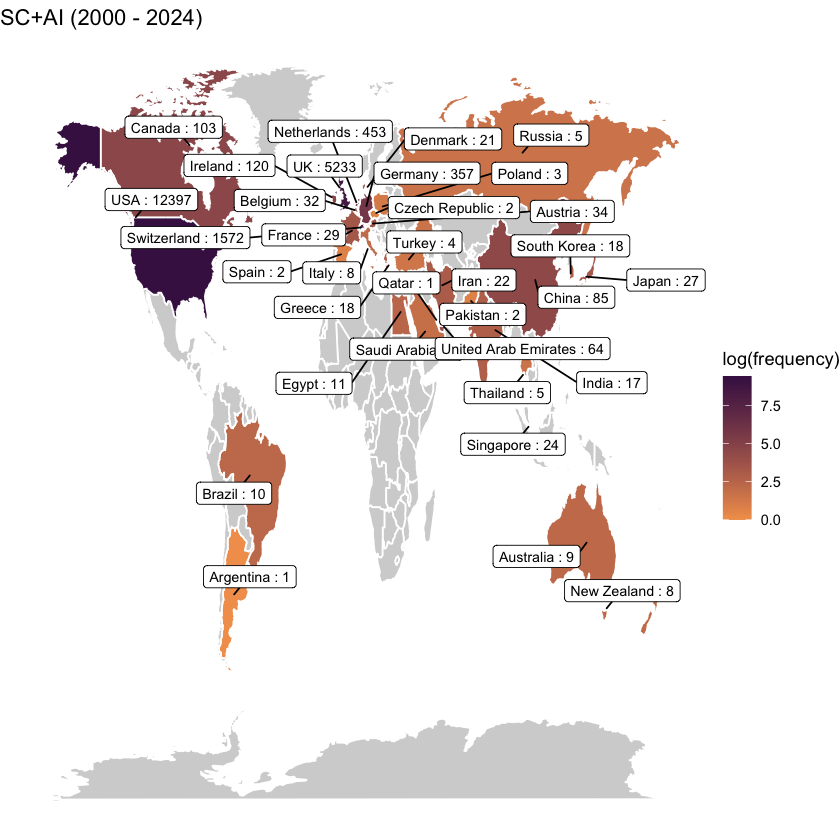

In [60]:
map_AI

  *barplot*

In [63]:
head(AI_countries_df)

region    frequency
1 Argentina   1      
2 Australia   9      
3 Austria    34      
4 Belgium    32      
5 Brazil     10      
6 Canada    103

In [66]:
barpAI = ggplot(AI_countries_df, aes(x = reorder(region, frequency), y = frequency, fill = log(frequency))) +
geom_col() +
#scale_y_continuous(limits = c(0,860)) +
#scale_y_break(c(70,200, c(260, 810))) +
theme_bw(20) +
#geom_label(aes(label = paste(frequency)), fill = 'white', size = 5) +
scale_fill_gradient(low = '#F39F5A', high = '#451952') +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
coord_flip()


In [67]:
tiff("~/Desktop/review/barplotAI+SC.tiff", units="in", width=10, height=8, res=300)
barpAI
dev.off()

pdf 
  2

### Stem cell + system biology

In [461]:
papers_SCsysB = entrez_search(db = 'pubmed', term = stem_sybi_map, retmax = 10000)
papers_SY_ids = papers_SCsysB$ids

In [467]:
SCsysBiolo_index = split(seq(1,length(papers_SY_ids)), ceiling(seq_along(seq(1,length(papers_SY_ids)))/50))
results_list_SYs = list()

In [468]:
for (batch in SCsysBiolo_index) {
  summaries = entrez_fetch(db = "pubmed", id = batch, rettype = "xml")
  xml = read_xml(summaries)
  countries_dl = xml_find_all(xml, "//Country")
  countries = xml_text(countries_dl)
  results_list_SYs[[length(results_list_SYs) + 1]] = data.frame(Pais = countries)

  Sys.sleep(5)
}

In [475]:
SY_countries_df = do.call(rbind, results_list_SYs)
SY_countries_df = table(SY_countries_df) |> data.frame()

In [476]:
SY_countries_df$Pais = c('Argentina','Armenia' ,'Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','Chine','China',
                        'Czech Republic','Denmark','UK','Finland','France','Germany','Hungary','India','Ireland','Israel','Italy',
                        'Japan','Kenya','Kyrgyzstan','Mexico','Netherlands','New Zealand','Norway','Pakistan','Peru','Philippines',
                        'Poland','Puerto Rico','Romania','Russia','UK', 'Serbia','Singapore','Slovakia','South Africa','Spain','Sweden',
                        'Switzerland','Thailand', 'Ukraine','UK','USA','Zimbabwe')
SY_countries_df = aggregate(Freq~Pais,data=SY_countries_df,FUN=sum)
colnames(SY_countries_df) = c("region","frequency")

In [803]:
openxlsx::write.xlsx(SY_countries_df, "./SY_countries_df.xlsx")

In [765]:
supplementary_table_2 = SY_countries_df
supplementary_table_2$category = ifelse(supplementary_table_2$frequency < 50, '<50', ifelse(supplementary_table_2$frequency < 100, '100', ifelse(supplementary_table_2$frequency < 500, '<500', ifelse(supplementary_table_2$frequency < 1000, '<1000', '>1000'))))

In [767]:
table(supplementary_table_2$category)


  100   <50  <500 >1000 
    4    37     4     2 

In [ ]:
all_to_map_SY = full_join(world_map, SY_countries_df)
cnames_stemSY = subset(all_to_map_SY, frequency != is.na(frequency))

region.data_SY.data = cnames_stemSY %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat), frequency = frequency)
region.data_SY.data = na.omit(region.data_SY.data)

In [667]:
map_Sysbio = ggplot(all_to_map_SY)+
  geom_polygon(aes(x = long, y = lat, group = group, fill = log(frequency)), colour = 'white') +
  scale_fill_gradient(low = '#F39F5A', high = '#451952', na.value = 'lightgray')+
   geom_label_repel(data = region.data_SY.data,
                  mapping = aes(long, lat, label = paste(region,":",frequency)),
                  size = 3, vjust = .5,position = "identity",
                  stat = "unique", point.padding = NA, min.segment.length = 0,
                  max.overlaps = getOption("ggrepel.max.overlaps", default = 200)) +
  theme_set(
    theme_void()
  ) +
  ggtitle('SC+SysBio (2000 - 2024)') 


In [668]:
tiff("~/Desktop/review/map_mundi_SY+SC.tiff", units="in", width=15, height=8, res=300)
map_Sysbio
dev.off()

pdf 
  2

In [673]:
barpSY = ggplot(SY_countries_df, aes(x = reorder(region, frequency), y = frequency, fill = log(frequency))) +
geom_col() +
#scale_y_continuous(limits = c(0,860)) +
scale_y_break(c(390,1000)) +
theme_bw(15) +
#geom_label(aes(label = paste(frequency)), fill = 'white', size = 2) +
scale_fill_gradient(low = '#F39F5A', high = '#451952') +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
legend.position = "none") +
coord_flip()

In [675]:
tiff("~/Desktop/review/barplotSY+SC.tiff", units="in", width=6, height=10, res=300)
barpSY
dev.off()

pdf 
  2

### Stem cell + SysBio + AI

In [568]:
papers_SCsysBAI = entrez_search(db = 'pubmed', term = stem_syai_map, retmax = 10000)
papers_SYAI_ids = papers_SCsysBAI$ids

In [569]:
SCsysBioloAI_index = split(seq(1,length(papers_SYAI_ids)), ceiling(seq_along(seq(1,length(papers_SYAI_ids)))/50))
results_list_SYsAI = list()

In [570]:
for (batch in SCsysBioloAI_index) {
  summaries = entrez_fetch(db = "pubmed", id = batch, rettype = "xml")
  xml = read_xml(summaries)
  countries_dl = xml_find_all(xml, "//Country")
  countries = xml_text(countries_dl)
  results_list_SYsAI[[length(results_list_SYsAI) + 1]] = data.frame(Pais = countries)

  Sys.sleep(5)
}

In [571]:
SYAI_countries_df = do.call(rbind, results_list_SYsAI)
SYAI_countries_df = table(SYAI_countries_df) |> data.frame()

In [577]:
head(SYAI_countries_df, 50)

region  frequency
1 Germany  6       
2 UK      38       
3 USA     26

In [576]:
SYAI_countries_df$Pais = c('UK', 'Germany', 'UK', 'USA')
SYAI_countries_df = aggregate(Freq~Pais,data=SYAI_countries_df,FUN=sum)
colnames(SYAI_countries_df) = c("region","frequency")

In [ ]:
all_to_map_SYai = full_join(world_map, SYAI_countries_df)
cnames_stemSYai = subset(all_to_map_SYai, frequency != is.na(frequency))

region.data_SYai.data = cnames_stemSYai %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat), frequency = frequency)
region.data_SYai.data = na.omit(region.data_SYai.data)

In [581]:
map_SysbioAI = ggplot(all_to_map_SYai)+
  geom_polygon(aes(x = long, y = lat, group = group, fill = log(frequency)), colour = 'white') +
  scale_fill_gradient(low = '#F39F5A', high = '#451952', na.value = 'lightgray')+
  theme_set(
    theme_void()
  ) +
  ggtitle('SC+SysBio (2000 - 2024)') 

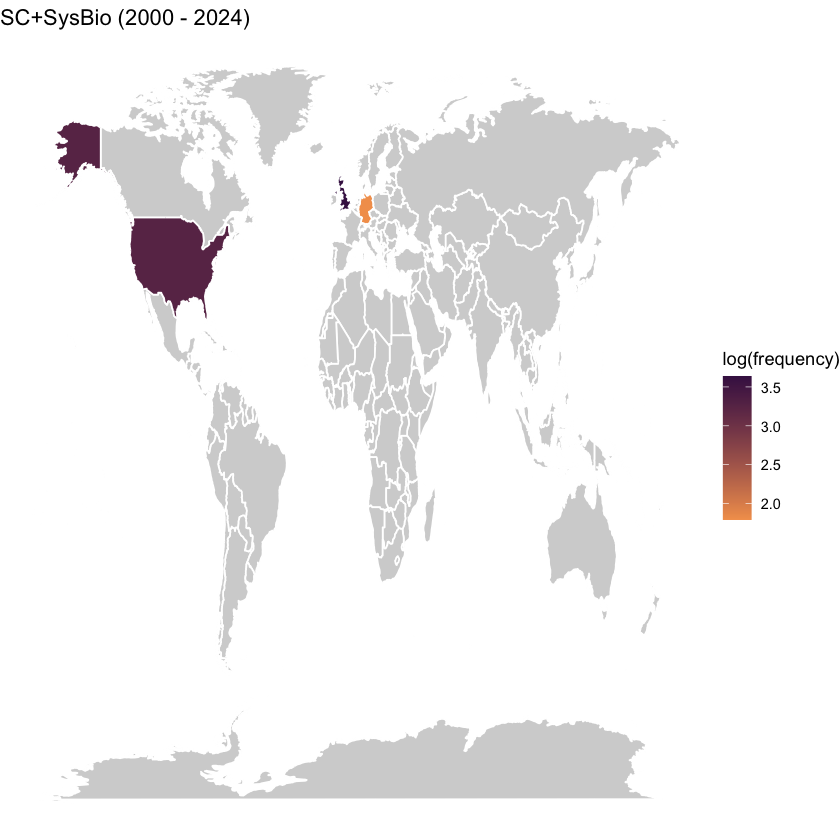

In [582]:
map_SysbioAI

## Search by ML and DL

In [74]:
stem_DL_map = "stem cell[Title/Abstract] AND deep learning[Title/Abstract] AND 2015:2024[PDAT]"
stem_ML_map = "stem cell[Title/Abstract] AND machine learning AND 2015:2024[PDAT]"

In [75]:
stem_DLp_map = entrez_search(db = 'pubmed', term = stem_DL_map, retmax = 10000)
stem_DLp_ids = stem_DLp_map$ids

In [76]:
stem_DLp_map

Entrez search result with 106 hits (object contains 106 IDs and no web_history object)
 Search term (as translated):  "stem cell"[Title/Abstract] AND "deep learning"[Ti ... 

In [77]:
SCDL_index = split(seq(1,length(stem_DLp_ids)), ceiling(seq_along(seq(1,length(stem_DLp_ids)))/50))
results_list_SCDL = list()

for (batch in SCDL_index) {
  summaries = entrez_fetch(db = "pubmed", id = batch, rettype = "xml")
  xml = read_xml(summaries)
  countries_dl = xml_find_all(xml, "//Country")
  countries = xml_text(countries_dl)
  results_list_SCDL[[length(results_list_SCDL) + 1]] = data.frame(Pais = countries)

  Sys.sleep(5)
}



In [78]:
dl_countries_df = do.call(rbind, results_list_SCDL)
dl_countries_df = table(dl_countries_df) |> data.frame()

In [79]:
dl_countries_df

Pais                Freq
1 England             24  
2 Germany              6  
3 Netherlands         35  
4 Russia (Federation)  7  
5 United Kingdom      17  
6 United States       36

In [691]:
dl_countries_df$Pais = c('UK','France','Germany','Netherlands','Poland','Russia','UK','USA')
dl_countries_df = aggregate(Freq~Pais,data=dl_countries_df,FUN=sum)
colnames(dl_countries_df) = c("region","frequency")

In [720]:
barDL = ggplot(dl_countries_df, aes(x = reorder(region, log(frequency)), y = log(frequency), fill = log(frequency))) +
geom_col() +
#scale_y_continuous(limits = c(0,860)) +
#scale_y_break(c(390,1000)) +
theme_minimal(22) +
#geom_label_repel(aes(label = paste(frequency)), fill = 'white', size = 5) +
scale_fill_gradient(low = '#F39F5A', high = '#451952') +
theme(axis.text.x = element_text(),
axis.text.y = element_blank(),
legend.position = "none") +
coord_polar()

In [721]:
tiff("~/Desktop/review/barplotdeep+SC.tiff", units="in", width=9, height=10, res=300)
barDL
dev.off()

pdf 
  2

#### Machine learning

In [709]:
stem_MLp_map = entrez_search(db = 'pubmed', term = stem_ML_map, retmax = 10000)
stem_MLp_ids = stem_MLp_map$ids

In [711]:
SCml_index = split(seq(1,length(stem_MLp_ids)), ceiling(seq_along(seq(1,length(stem_MLp_ids)))/50))
results_list_SCML = list()

for (batch in SCml_index) {
  summaries = entrez_fetch(db = "pubmed", id = batch, rettype = "xml")
  xml = read_xml(summaries)
  countries_dl = xml_find_all(xml, "//Country")
  countries = xml_text(countries_dl)
  results_list_SCML[[length(results_list_SCML) + 1]] = data.frame(Pais = countries)

  Sys.sleep(5)
}


In [713]:
ml_countries_df = do.call(rbind, results_list_SCML)
ml_countries_df = table(ml_countries_df) |> data.frame()

In [715]:
ml_countries_df

Pais                Freq
1  Canada               11 
2  China                 1 
3  Czech Republic        1 
4  Denmark               1 
5  England             115 
6  France                4 
7  Germany              18 
8  India                 5 
9  Ireland               4 
10 Israel                1 
11 Italy                 3 
12 Japan                13 
13 Netherlands          49 
14 Poland                5 
15 Russia (Federation)  16 
16 Switzerland          11 
17 United Kingdom       37 
18 United States       188

In [716]:
ml_countries_df$Pais = c('Canada','China','Czech Republic','Denmark','UK','France','Germany','India','Ireland','Israel','Italy','Japan','Netherlands','Poland','Russia','Switzerland','UK','USA')
ml_countries_df = aggregate(Freq~Pais,data=ml_countries_df,FUN=sum)
colnames(ml_countries_df) = c("region","frequency")

In [722]:
barML = ggplot(ml_countries_df, aes(x = reorder(region, log(frequency)), y = log(frequency), fill = log(frequency))) +
geom_col() +
#scale_y_continuous(limits = c(0,860)) +
#scale_y_break(c(390,1000)) +
theme_minimal(22) +
#geom_label_repel(aes(label = paste(frequency)), fill = 'white', size = 5) +
scale_fill_gradient(low = '#F39F5A', high = '#451952') +
theme(axis.text.x = element_text(),
axis.text.y = element_blank(),
legend.position = "none") +
coord_polar()

In [723]:
tiff("~/Desktop/review/barplotML+SC.tiff", units="in", width=9, height=10, res=300)
barML
dev.off()

pdf 
  2

# Supplementary tables

In [799]:
stem_cell_Sy_table = "stem cell AND systems biology AND 2000:2024[PDAT]"
stem_cell_AI_table = "stem cell AND artificial intelligence AND {years}[PDAT]"
steM_cell_AI_Sy_table = "stem cell AND system biology AND artificial intelligence AND {years}[PDAT]"

In [800]:
papers_stem_cell_Sy_table = entrez_search(db = 'pubmed', term = "stem cell AND systems biology AND 2000:2024[PDAT]", retmax = 500)
papers_ids_stem_cell_Sy_table = papers_stem_cell_Sy_table$ids

bigqueryindex_papers_ids_stem_cell_Sy_table = split(seq(1,length(papers_ids_stem_cell_Sy_table)), ceiling(seq_along(seq(1,length(papers_ids_stem_cell_Sy_table)))/100))
esummaries_papers_ids_stem_cell_Sy_table = list()

for (i in bigqueryindex_papers_ids_stem_cell_Sy_table) {
  esummaries_papers_ids_stem_cell_Sy_table[unlist(i)] <- entrez_summary("pubmed", id = papers_ids_stem_cell_Sy_table[unlist(i)])
  Sys.sleep(5)
}